Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Step 1 importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# Step 2 Reading Dataset and Understanding Data

In [2]:
#read thecsv file
bikeSharing_df=pd.read_csv("day.csv")
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#to know the shape 
bikeSharing_df.shape

(730, 16)

In [4]:
#checking dataframe of null values and their datatypes
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking statistical data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking columns
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### There are 730 rows and 16 columns with no null values

# Step 3 Cleaning Data

In [7]:
#removing instant
bikeSharing_df.drop(["instant"],axis=1,inplace=True)

In [8]:
#droping dteday column as it is additional data
bikeSharing_df.drop(["dteday"],axis=1,inplace=True)

In [9]:
#droping "casual" and "registered" columns as our target is "cnt"
bikeSharing_df.drop(["casual"],axis=1,inplace=True)
bikeSharing_df.drop(["registered"],axis=1,inplace=True)

In [10]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#checking correlations
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


# Visualizing data

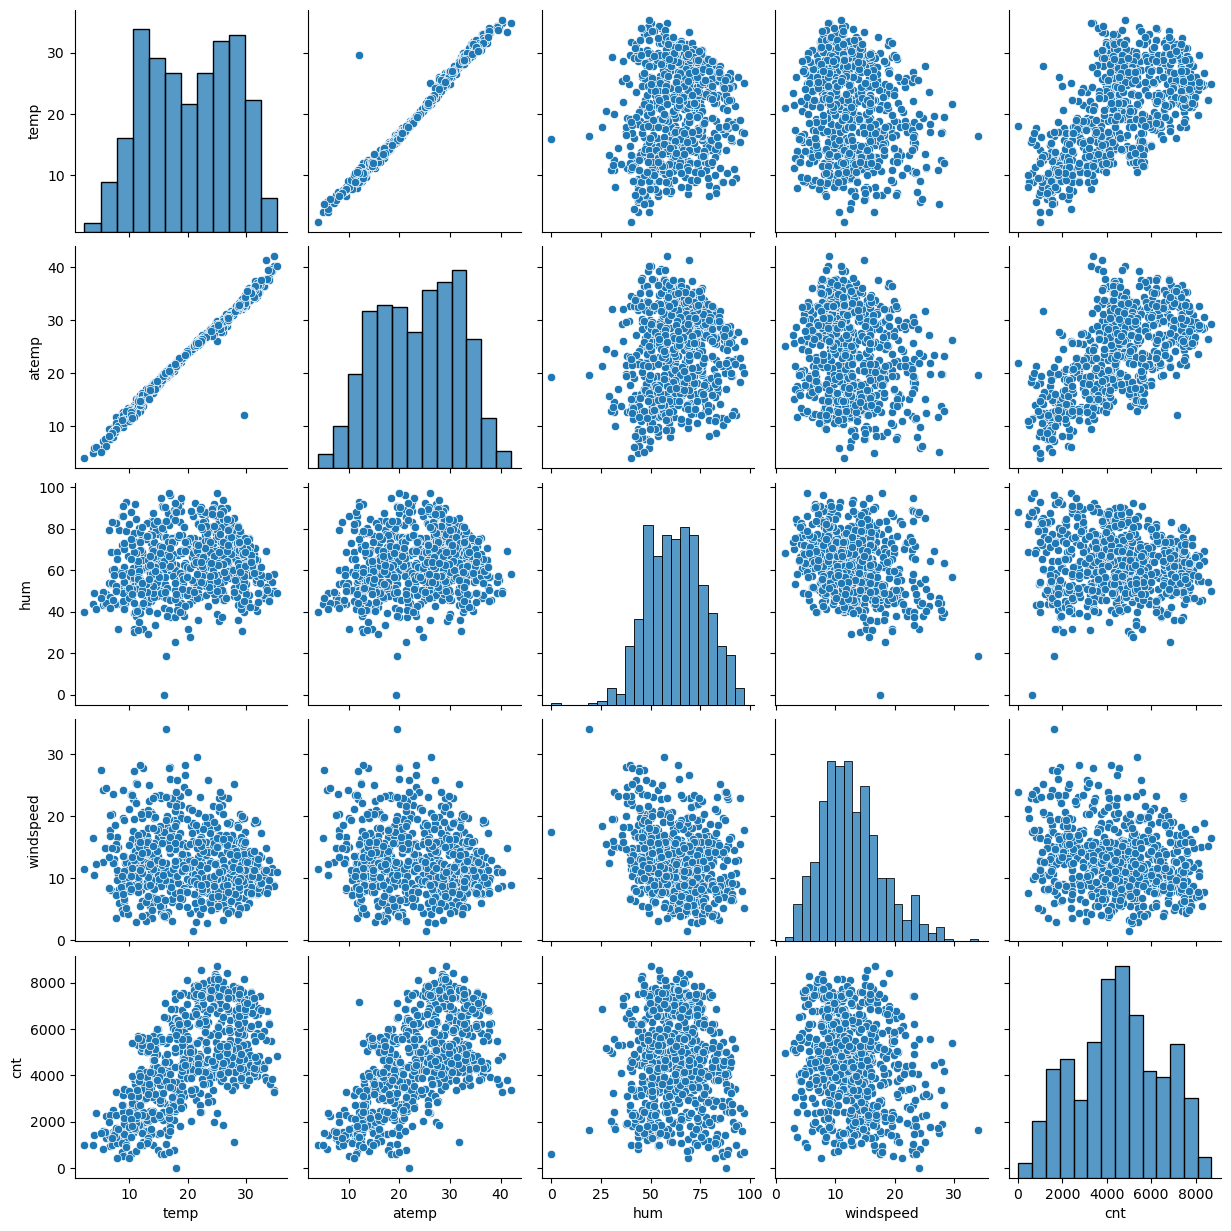

In [12]:
sns.pairplot(bikeSharing_df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

## observations from pairplot
1.temp is highly correlated with atemp
2.temp is correalteed with cnt
3.atemp is corelated with cnt


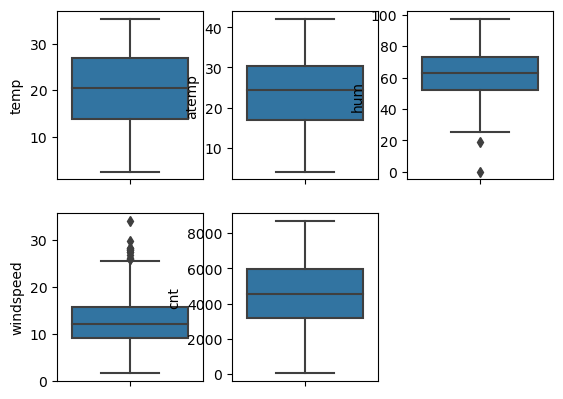

In [14]:
#ploting box plot for checking outliers
col1=["temp","atemp","hum","windspeed","cnt"]
i=1
for cols in col1:
    plt.subplot(2,3,i)
    sns.boxplot(y=cols,data=bikeSharing_df)
    i+=1

# Mapping into categorical data

In [15]:
#defing mapping functions
def map_season(x):
    return x.map({1:"spring",2:"summer",3:"fall",4:"winter"})
def map_weathersit(x):
    return x.map({1:"good",2:"moderate",3:"bad",4:"severe"})
def map_month(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"April",5:"May",6:"June",7:"July",8:"August",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
def map_weekday(x):
    return x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"})

In [16]:
#Applying Functions
bikeSharing_df[["season"]]=bikeSharing_df[["season"]].apply(map_season)
bikeSharing_df[["weathersit"]]=bikeSharing_df[["weathersit"]].apply(map_weathersit)
bikeSharing_df[["mnth"]]=bikeSharing_df[["mnth"]].apply(map_month)
bikeSharing_df[["weekday"]]=bikeSharing_df[["weekday"]].apply(map_weekday)

### Creating Dummy Variables

In [17]:
season_dummy=pd.get_dummies(bikeSharing_df[["season"]],drop_first=True)


In [18]:
season_dummy=season_dummy.astype(int)

In [19]:
season_dummy.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
#getting dummy variable for weathersit
weathersit_dummy=pd.get_dummies(bikeSharing_df["weathersit"],drop_first=True)

In [21]:
weathersit_dummy=weathersit_dummy.astype(int)
weathersit_dummy.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [22]:
#weekday dummy variable
weekday_dummy=pd.get_dummies(bikeSharing_df["weekday"],drop_first=True)
weekday_dummy=weekday_dummy.astype(int)

In [23]:
#mnth dummy Variable
mnth_dummy=pd.get_dummies(bikeSharing_df["mnth"],drop_first=True)
mnth_dummy=mnth_dummy.astype(int)

In [24]:
#add the result to the original data base
bikeSharing_df=pd.concat([bikeSharing_df,season_dummy,weathersit_dummy,weekday_dummy,mnth_dummy],axis=1)

In [25]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,good,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,good,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,good,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [26]:
bikeSharing_df.shape

(730, 34)

In [27]:
del_col=["season","weathersit","weekday","mnth"]
bikeSharing_df.drop(del_col,inplace=True,axis=1)

In [28]:
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'good',
       'moderate', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'August', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

## Splitting data into taining and testing set

In [30]:
bikeSharing_df_train,bikeSharing_df_test=train_test_split(bikeSharing_df,test_size=0.3,train_size=0.7,random_state=100)

In [31]:
bikeSharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#apply scaler to all the variables except dummy variables

In [33]:
scaler=MinMaxScaler()
col2=["temp","atemp","hum","windspeed","cnt"]
bikeSharing_df_train[col2]=scaler.fit_transform(bikeSharing_df_train[col2])

In [34]:
bikeSharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


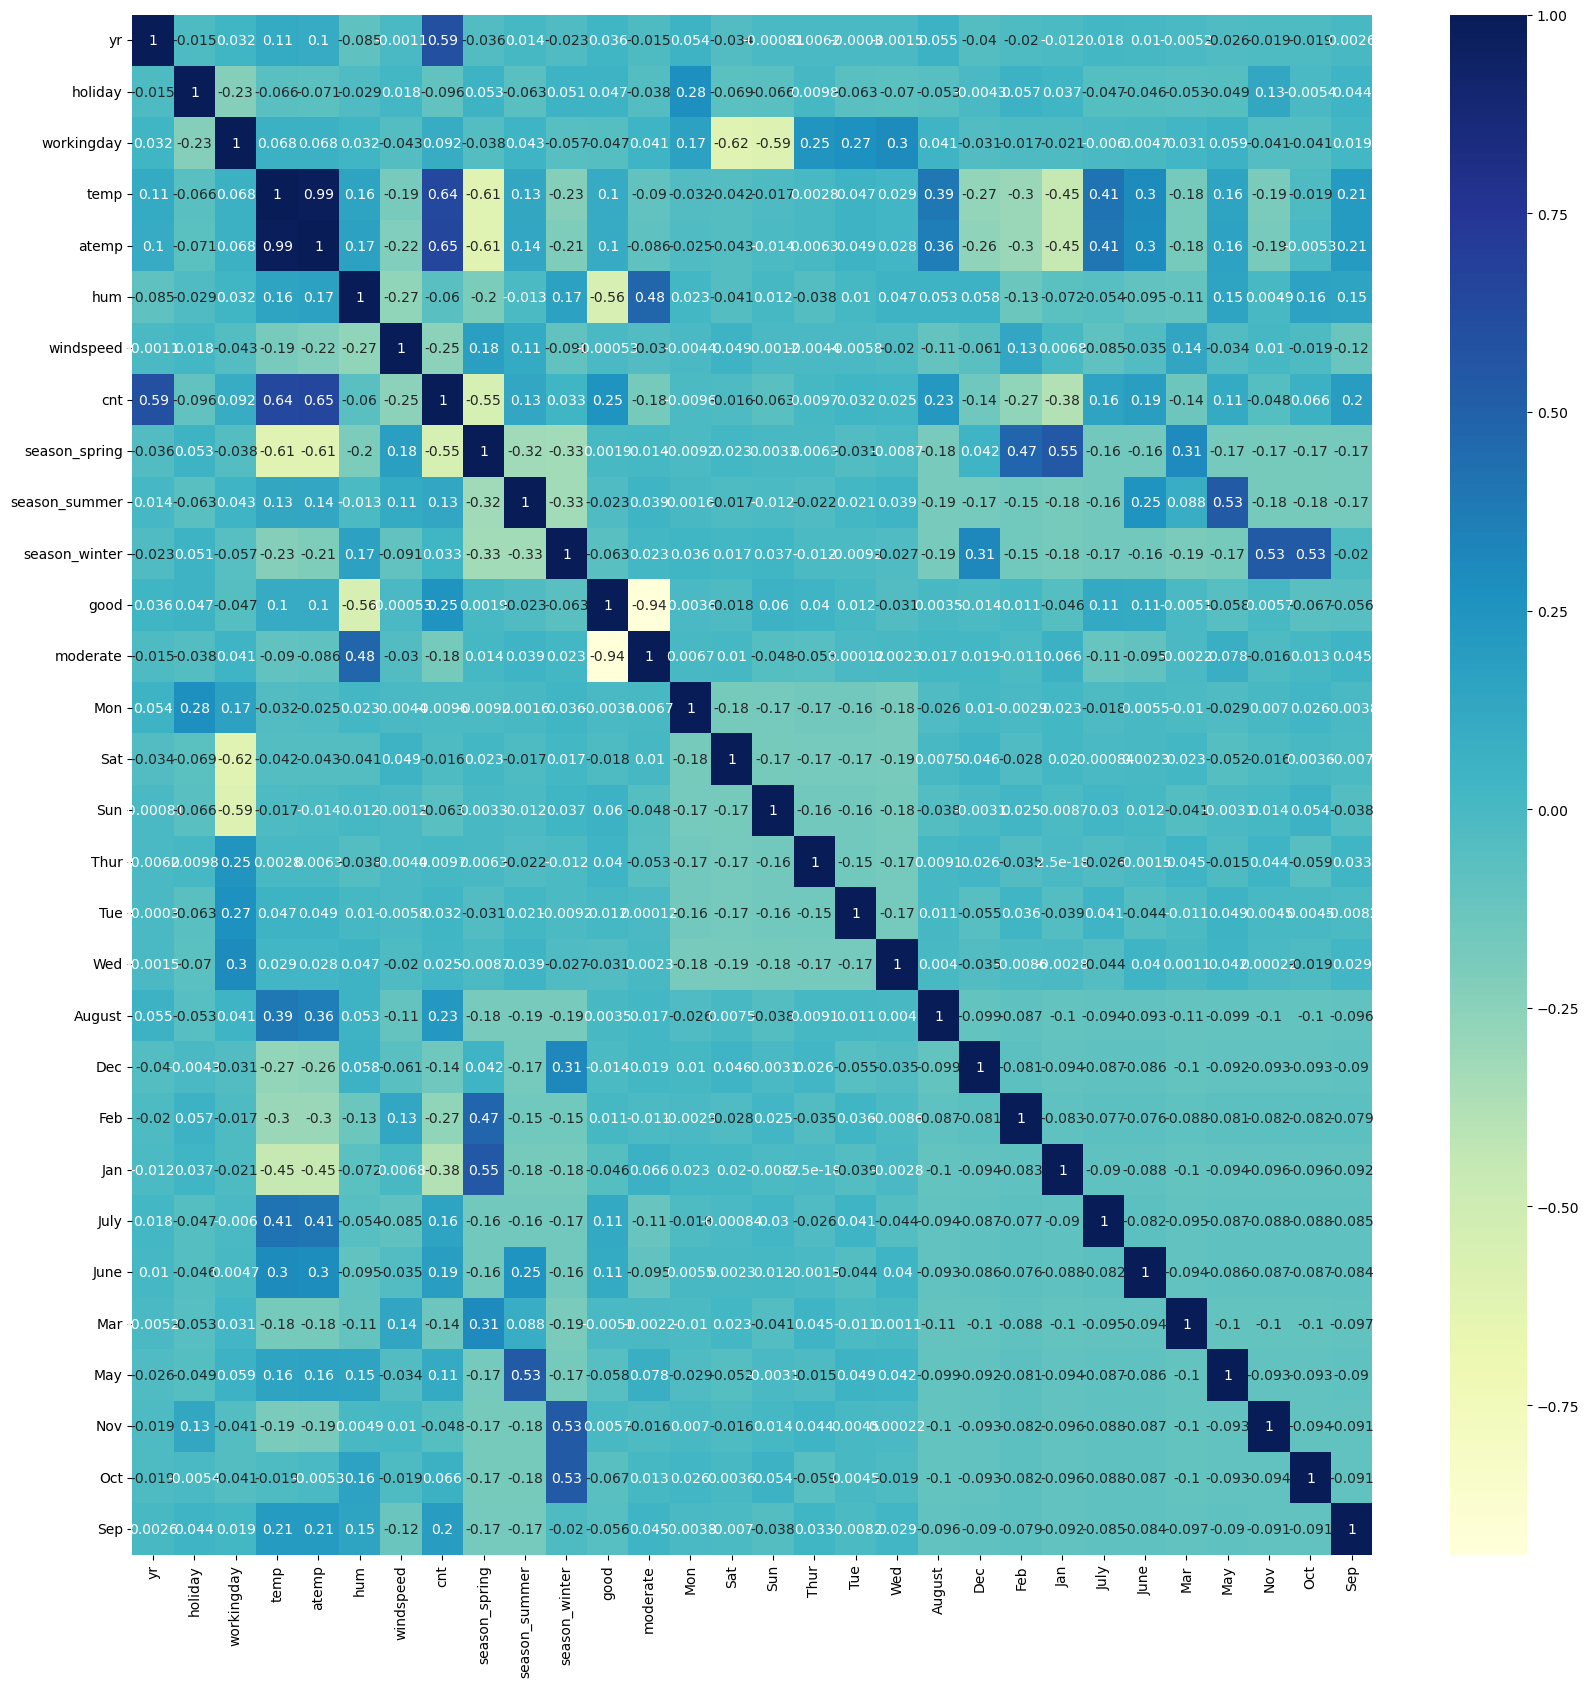

In [35]:
#checking colinearity
plt.figure(figsize=[20,20])
sns.heatmap(bikeSharing_df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Observations from heatmap
1.atemp and temp is highly correlated with cnt
2.atemp and temp are highly correlated 
3.holiday is negatvely correlated with cnt

In [36]:
bikeSharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


## Diving into X and Y set for model building

In [37]:
y_train=bikeSharing_df_train.pop("cnt")
x_train=bikeSharing_df_train

In [38]:
x_train.shape

(510, 29)

In [39]:
y_train.shape

(510,)

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## RFE(Recursive Feature Elimination)

In [41]:
#using RFE forfeature selection and limiting to selection to 15 features
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [42]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thur', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('August', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [43]:
#colummns suggested by rfe
col3=x_train.columns[rfe.support_]
col3

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'good', 'moderate',
       'Sat', 'Jan', 'July', 'Sep'],
      dtype='object')

In [44]:
#columns rejected by rfe
x_train.columns[~rfe.support_]

Index(['atemp', 'Mon', 'Sun', 'Thur', 'Tue', 'Wed', 'August', 'Dec', 'Feb',
       'June', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

## Building MOdel using statsmodel

In [45]:
#calculating VIFs for the new model
def calculate_VIF(col3,x_train):
    vif=pd.DataFrame()
    vif["features"]=col3
    vif["VIF"]=[variance_inflation_factor(x_train[col3].values,i) for i in range(x_train[col3].shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    display(vif)
    

In [46]:
#creating x_test dataframe with rfe selected variables
x_train_rfe=x_train[col3]

In [47]:
#adding a constant variable
x_train_rfe=sm.add_constant(x_train_rfe)

In [48]:
#running first linear model
lm=sm.OLS(y_train,x_train_rfe).fit()


In [49]:
#printing summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.31e-191
Time:                        12:10:35   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.048      0.047

In [50]:
#calculating VIF 
calculate_VIF(col3,x_train)

,features,VIF
4,hum,25.64
3,temp,22.83
9,good,14.85
10,moderate,9.02
6,season_spring,5.69
2,workingday,5.42
5,windspeed,4.68
8,season_winter,4.14
7,season_summer,3.20
0,yr,2.10


## we need to bring all the VIFs below 5 to avoid multicolearity issue

In [60]:
#dropping hum variable
x_train_1=x_train[col3].drop(["hum"],axis=1)

In [61]:
#adding a constant
x_train_lm=sm.add_constant(x_train_1)

In [62]:
#running the second model
lm_2=sm.OLS(y_train,x_train_lm).fit()

In [63]:
#printing summary
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          7.33e-189
Time:                        12:23:03   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1181      0.039     -3.007

In [64]:
calculate_VIF(x_train_1.columns,x_train_1)

,features,VIF
8,good,14.84
3,temp,13.95
9,moderate,8.43
2,workingday,5.34
4,windspeed,4.67
5,season_spring,4.48
6,season_summer,2.77
7,season_winter,2.76
0,yr,2.08
10,Sat,1.99


In [65]:
#dropping holiday variable
x_train_2=x_train_1.drop(["holiday"],axis=1)
#adding a constant
x_train_lm_2 = sm.add_constant(x_train_2)
#running the third model
lm_3=sm.OLS(y_train,x_train_lm_2).fit()
#printing summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.11e-189
Time:                        12:23:04   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1249      0.039     -3.183

In [66]:
calculate_VIF(x_train_2.columns,x_train_2)

,features,VIF
7,good,14.71
2,temp,13.88
8,moderate,8.38
1,workingday,4.73
3,windspeed,4.66
4,season_spring,4.45
5,season_summer,2.77
6,season_winter,2.73
0,yr,2.08
9,Sat,1.85


In [67]:
#dropping Jan variable
x_train_3=x_train_2.drop(["Jan"],axis=1)
#adding a constant
x_train_lm_3 = sm.add_constant(x_train_3)
#running the fourth model
lm_4=sm.OLS(y_train,x_train_lm_3).fit()
#printing summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          3.28e-189
Time:                        12:23:04   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1400      0.039     -3.605

In [69]:
calculate_VIF(x_train_3.columns,x_train_3)

,features,VIF
7,good,14.33
2,temp,13.36
8,moderate,8.10
1,workingday,4.72
3,windspeed,4.62
4,season_spring,4.12
5,season_summer,2.77
6,season_winter,2.72
0,yr,2.07
9,Sat,1.84


In [70]:
#dropping good variable
x_train_4=x_train_3.drop(["good"],axis=1)
#adding a constant
x_train_lm_4 = sm.add_constant(x_train_4)
#running the fifth model
lm_5=sm.OLS(y_train,x_train_lm_4).fit()
#printing summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.25e-163
Time:                        12:26:01   Log-Likelihood:                 443.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     498   BIC:                            -811.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1439      0.035      4.163

In [71]:
calculate_VIF(x_train_4.columns,x_train_4)

,features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.58
4,season_spring,2.38
5,season_summer,2.31
0,yr,2.06
6,season_winter,1.91
8,Sat,1.82
9,July,1.58
7,moderate,1.54


In [72]:
#dropping temp variable
x_train_5=x_train_4.drop(["temp"],axis=1)
#adding a constant
x_train_lm_5 = sm.add_constant(x_train_5)
#running the fifth model
lm_6=sm.OLS(y_train,x_train_lm_5).fit()
#printing summary
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.21e-130
Time:                        12:27:36   Log-Likelihood:                 362.26
No. Observations:                 510   AIC:                            -702.5
Df Residuals:                     499   BIC:                            -656.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5383      0.022     24.390

In [73]:
calculate_VIF(x_train_5.columns,x_train_5)

,features,VIF
2,windspeed,4.12
1,workingday,3.53
3,season_spring,2.25
4,season_summer,2.24
5,season_winter,1.91
0,yr,1.90
7,Sat,1.61
6,moderate,1.53
8,July,1.29
9,Sep,1.22


In [74]:
#dropping July variable
x_train_6=x_train_5.drop(["July"],axis=1)
#adding a constant
x_train_lm_6 = sm.add_constant(x_train_6)
#running the sixth model
lm_7=sm.OLS(y_train,x_train_lm_6).fit()
#printing summary
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.11e-131
Time:                        12:34:37   Log-Likelihood:                 362.15
No. Observations:                 510   AIC:                            -704.3
Df Residuals:                     500   BIC:                            -662.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5338      0.020     26.698

In [75]:
calculate_VIF(x_train_6.columns,x_train_6)

,features,VIF
2,windspeed,3.95
1,workingday,3.28
3,season_spring,2.00
4,season_summer,1.98
0,yr,1.87
5,season_winter,1.72
7,Sat,1.55
6,moderate,1.53
8,Sep,1.18


In [76]:
#dropping season_summer variable
x_train_7=x_train_6.drop(["season_summer"],axis=1)
#adding a constant
x_train_lm_7 = sm.add_constant(x_train_7)
#running the seventh model
lm_8=sm.OLS(y_train,x_train_lm_7).fit()
#printing summary
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.89e-131
Time:                        12:37:01   Log-Likelihood:                 358.97
No. Observations:                 510   AIC:                            -699.9
Df Residuals:                     501   BIC:                            -661.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5171      0.019     27.294

In [78]:
calculate_VIF( x_train_7.columns,x_train_7)

,features,VIF
2,windspeed,3.38
1,workingday,3.06
0,yr,1.86
3,season_spring,1.51
6,Sat,1.51
5,moderate,1.49
4,season_winter,1.37
7,Sep,1.11


#### 1.Model 8 is our last model

#### 2.R-squared value is 0.715


#### 3. Adjusted R squared value is 0.711

#### 4. All VIFs are below 5

#### 5. All p values are below 0.005

## Residual Analysis of the train data

In [81]:
y_train_cnt=lm_8.predict(x_train_lm_7)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline


<Figure size 640x480 with 0 Axes>

Text(0.5, 0.98, 'error terms')

<Figure size 640x480 with 0 Axes>

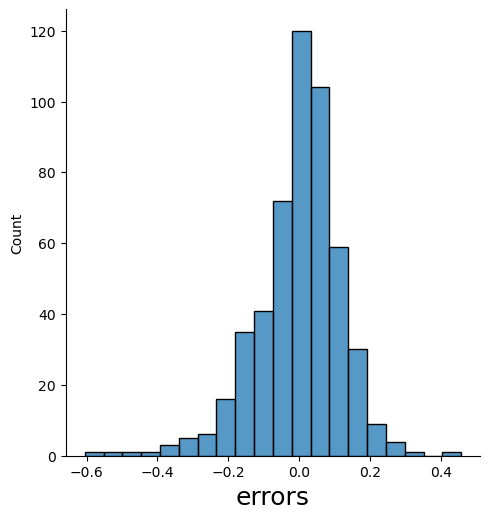

In [95]:
fig=plt.figure()
sns.displot((y_train-y_train_cnt),bins=20)
plt.xlabel("errors",fontsize=18)
fig.suptitle("error terms",fontsize=20)

#### The residuals are following normal distribution with mean =0


#### looking for patterns in the residuals

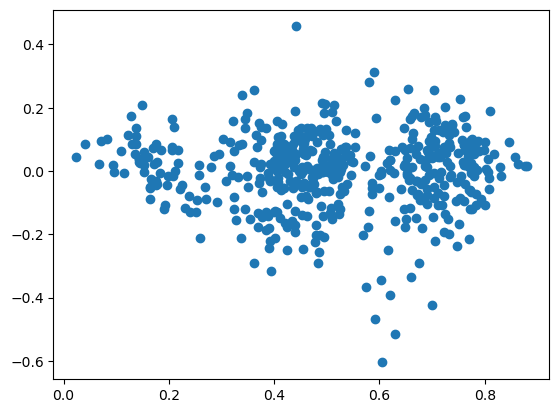

In [96]:
plt.scatter(y_train_cnt,(y_train-y_train_cnt))

From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

In [97]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

In [98]:
bikeSharing_df_test[num_vars] = scaler.transform(bikeSharing_df_test[num_vars])

In [99]:
bikeSharing_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [101]:
#Dividing into x_test and y_test

In [102]:
y_test=bikeSharing_df_test.pop("cnt")
x_test=bikeSharing_df_test

In [105]:
#use our model to make prediction
#creating x_test_new dataframe by dropping variables from x_test
x_test_new=x_test[x_train_7.columns]
#adding a constant
x_test_new=sm.add_constant(x_test_new)


In [108]:
#making predictions
y_pred=lm_8.predict(x_test_new)

Text(0, 0.5, 'y_pred')

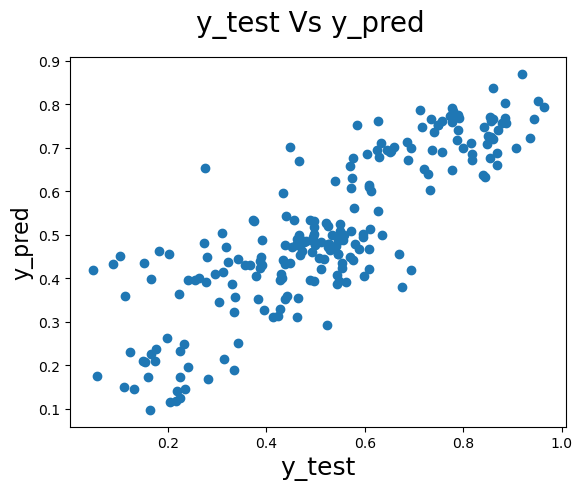

In [109]:
#plotting y_test and Y_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test Vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)

In [113]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

0.7044931707000681

In [114]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.89e-131
Time:                        14:32:18   Log-Likelihood:                 358.97
No. Observations:                 510   AIC:                            -699.9
Df Residuals:                     501   BIC:                            -661.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5171      0.019     27.294

#### Analysing the above model, the comapany should focus on the following features:

1.holiday
2.temp
3.hum
4.windspeed
5.Season
6.months(Jan, July, September, November, December)
7.Year (2019)
8.Sat
9.weathersit(moderate)